Давыдов ПИм-231 лаба 8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

1) Данные (house_train.csv) представляют собой набор данных о ценах на
жилье. Подготовьте информацию о датасете:

In [ ]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('house_train.csv')
df.drop('Id', axis=1, inplace=True)
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

2) Просмотреть основную информацию по датасету

In [ ]:
df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

а) чему равно среднее значение?

180921.195890


б) чему равно стандартное отклонение?

79442.502883


3) Проверьте, есть ли пропуски и повторы в данных.

In [ ]:
na_number=(df.isna().sum())
print(na_number)

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


4) Повторяющиеся строки – дубликаты – выявляются методом
duplicated() и подсчитываются тем же sum(). Если возвращаются нули, то
данные пригодны для исследования:

In [ ]:
duplicated_number=df.duplicated().sum()
print(duplicated_number)


0


5) Получите список названий столбцов, запросив атрибут columns.

In [ ]:
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

5) Анализ пропущенных значений и удаление

а) Выясним, в каких параметрах отсутствует статистика (данные):


In [ ]:
na_count = df.isnull().sum().sort_values(ascending=False) # Вычисляем, сколько пропущенных значений в параметрах

na_rate = na_count / len(df) # Вычисляем частоту или вероятность, с которой пропущенное значение встречается в каждом параметре. Если вероятность большая (>0.5), столбцыпараметры можно смело удалять).
# формируем массив для печати
na_data = pd.concat([na_count, na_rate],axis=1,keys=['count','ratio'])
print(na_data)


             count     ratio
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
FireplaceQu    690  0.472603
...            ...       ...
Heating          0  0.000000
HeatingQC        0  0.000000
MSZoning         0  0.000000
1stFlrSF         0  0.000000
SalePrice        0  0.000000

[80 rows x 2 columns]


б) Вообще говоря, если количество отсутствующих данных для
определенного признака достигает более 15%, то этот признак следует удалить, и
считается, что такого признака нет в наборе данных – то есть мы не будем
пытаться заполнить отсутствующие значения этих признаков).
– Проследим за количеством оставшихся столбцов. Зафиксируем первоначальное
количество столбцов с помощью функции:

In [ ]:
df.shape

(1460, 80)

Удалите столбцы с максимальным количеством отсутствующих данных:
'PoolQC', 'MiscFeature' и 'Alley'. Это не должно привести к
уменьшению эффективного объема информации в данных, поскольку
буквальные значения этих признаков, похоже, не имеют ничего общего с
интересующим нас признаком – цена на жилье.

In [ ]:
df_new=df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1)
print(df_new.isna().sum())
df_new.shape


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64


(1460, 77)

В оставшихся переменных с пропущенными значениями несколько функций GarageX. 'GarageQual' и 'GarageCond' имеют одинаковое количество
пропущенных значений. На основании этого делаем вывод, что они могут представлять один и тот же набор наблюдений, поэтому удалим эти функции. Ту же
операцию можно выполнить для Fence – изгородь – 1179 нулей.

In [ ]:
df_new = df_new.drop(['GarageQual', 'GarageCond', 'Fence'], axis=1)
print(df_new.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64


Что касается MasVnrArea и MasVnrType, в соответствии с их буквальным значением, мы думаем, что они не важны, и у них есть сильная корреляция
(как мы увидим дальше) с YearBuilt и GeneralQual. Таким образом, мы не
потеряем никакой информации, если удалим эти две функции.

In [ ]:
df_new=df_new.drop(['MasVnrArea', 'MasVnrType'], axis=1)
print(df_new.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 72, dtype: int64


In [ ]:
df_new.shape

(1460, 72)

6. Однофакторный анализ данных

- Переименуем опять файл:


In [ ]:
df = df_new


- Проверим размер данных:

In [ ]:
df.shape


(1460, 72)

- Считаем заново исходный файл с данными:

In [ ]:
df = pd.read_csv('house_train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


6.1. Гистограмма

Построим гистограмму параметра SalePrice в библиотеке seaborn:

<ipython-input-45-ee23fe7e19e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

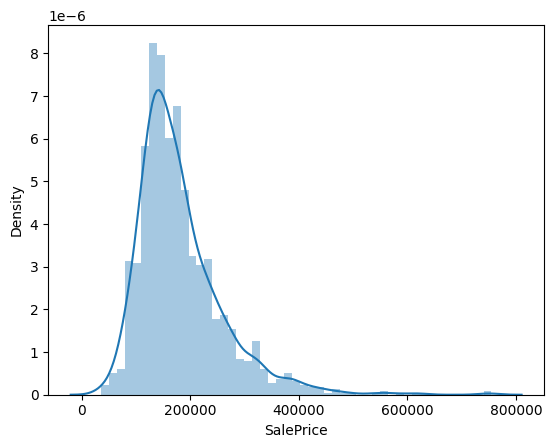

In [ ]:
sns.distplot(df['SalePrice'])

По рисунку: цена дома подчиняется нормальному распределению?

Проверьте эту гипотезу, изучив приложенные ссылки.


In [ ]:
stat, p_value = shapiro(df['SalePrice'])

alpha = 0.05
if p_value > alpha:
  print("SalePrice подчиняется нормальному распределению (не отвергаем нулевую гипотезу)")
else:
  print("SalePrice не подчиняется нормальному распределению (отвергаем нулевую гипотезу)")

SalePrice не подчиняется нормальному распределению (отвергаем нулевую гипотезу)


Задание: Постройте гистограмму параметра SalePrice всех домов c заголовком
'Histogram of Sale Price', заголовок оси х – 'price', заголовок оси у
– 'count'.

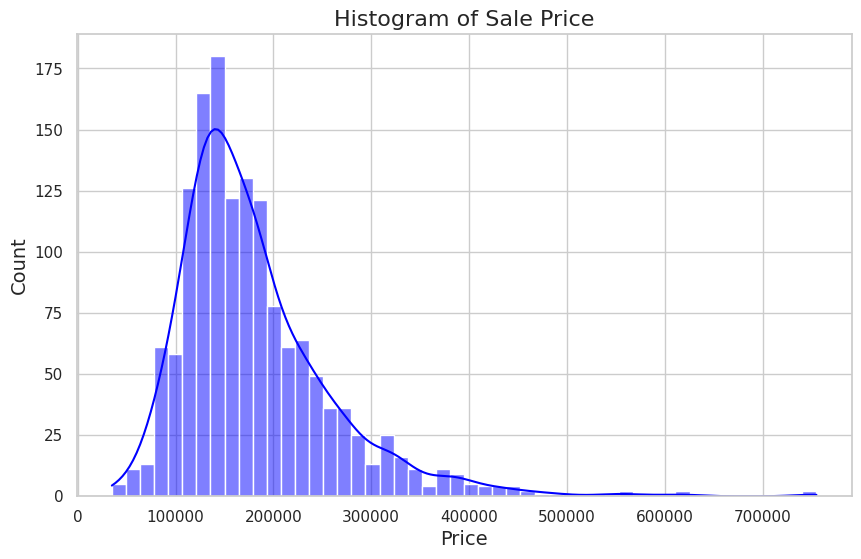

In [ ]:
sns.set(style='whitegrid')

# Создание гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SalePrice', bins=50, kde=True, color='blue')

# Настройка заголовков
plt.title('Histogram of Sale Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

6.2. Boxplot
Построить коробочную диаграмму (ящик с усами) признака SalePrice всех
домов в данных. Боксплоты не показывают форму распределения, но они могут
дать нам лучшее представление о центре и распространении распределения,  а
также о любых возможных выбросах, которые могут существовать. Боксплоты и
гистограммы часто дополняют друг друга и помогают нам лучше понять данные.
Заголовок рисунка – title='Box plot of SalePrice'.

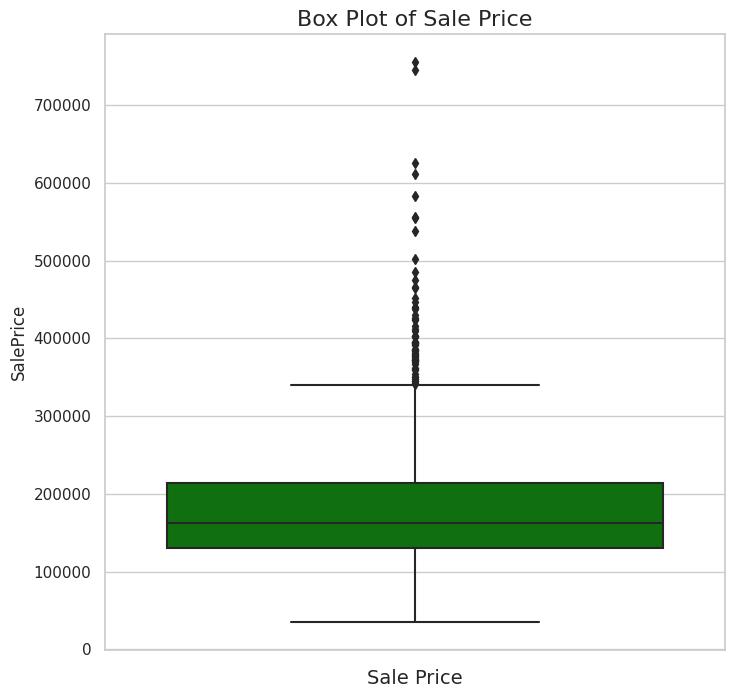

In [ ]:
# Настройка стиля графика
sns.set(style='whitegrid')

# Создание коробочной диаграммы
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, y='SalePrice', color='green')

# Настройка заголовков
plt.title('Box Plot of Sale Price', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.show()

6.3. Гистограммы и Боксплоты по группам
На графиках по группам, мы можем видеть, как переменная меняется в ответ на
изменение другой, например, как меняется стоимость дома SalePrice в
зависимости от того, есть ли кондиционер или нет (параметр 'CentralAir'). Или,
как цена дома SalePrice зависит от размера гаража и т.д.

а) Для построения Boxplot и гистограмм цены дома сгруппируем данные с
кондиционером (name = 'With air conditioning') и без кондиционера
(name = 'No air conditioning'); для Boxplot title = "Boxplot of
Sale Price by air conditioning".

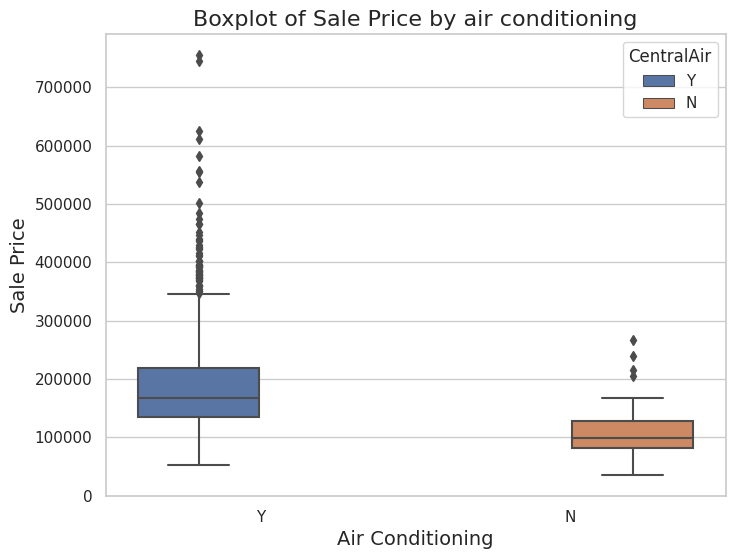

In [ ]:
sns.set(style='whitegrid')

# Создание коробочной диаграммы с группировкой по наличию кондиционера
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='CentralAir', y='SalePrice', hue='CentralAir')

# Настройка заголовков
plt.title('Boxplot of Sale Price by air conditioning', fontsize=16)
plt.xlabel('Air Conditioning', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

б) Для гистограммы – заголовок title='Histogram of House Sale
Price for both with and with no Central air conditioning'


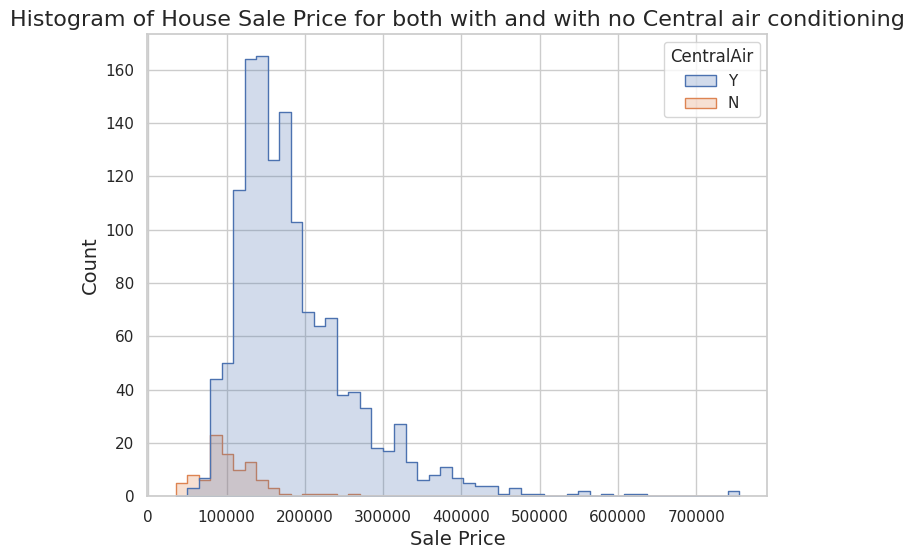

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='SalePrice', hue='CentralAir', element='step', common_norm=False)

# Настройка заголовков
plt.title('Histogram of House Sale Price for both with and with no Central air conditioning', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

в) Выведем описательную статистику 'CentralAir' и 'SalePrice' с
помощью инструкции:

In [ ]:
df.groupby('CentralAir')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
CentralAir,,,,,,,,
N,95.0,105264.073684,40671.273961,34900.0,82000.0,98000.0,128500.0,265979.0
Y,1365.0,186186.709890,78805.206820,52000.0,134800.0,168000.0,219210.0,755000.0


г) Постройте Boxplot и гистограмму цены продажи домов (параметр
'SalePrice'), сгруппированные по размеру гаража (параметр
'GarageCars'): title = "Boxplot of Sale Price by garage
size".
Используйте при группировке name = 'no garage' и name = '1-
car garage' – если гараж для одной машины; name = '2-car garage' –
если гараж для двух машин; name = '3-car garage' – если гараж для трех
машин; name = '4-car garage' – если гараж для четырех машин.

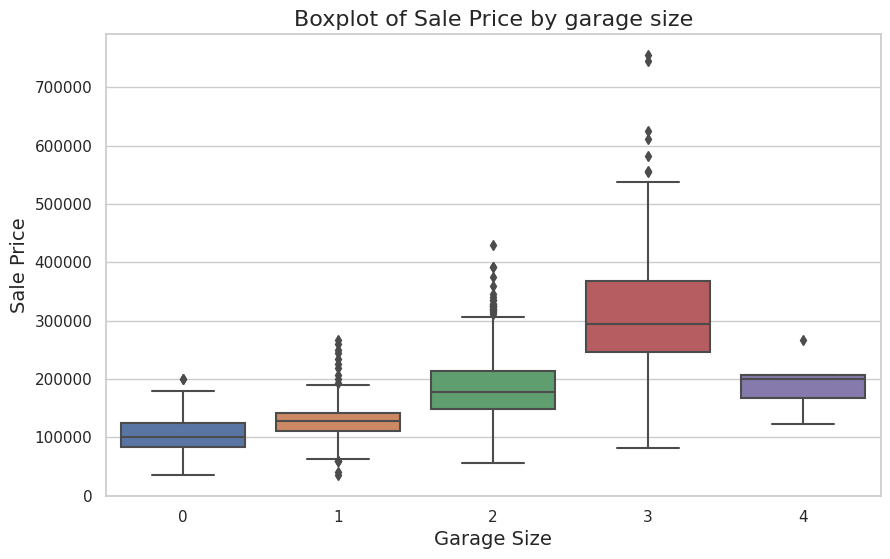

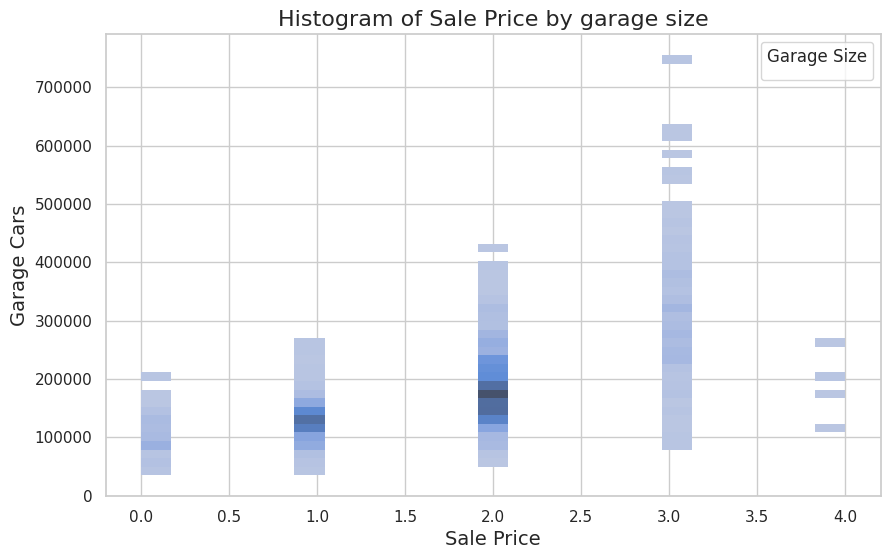

In [ ]:
sns.set(style='whitegrid')

# Создание Boxplot с группировкой по размеру гаража
df.groupby('GarageCars')['SalePrice']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GarageCars', y='SalePrice')

# Настройка заголовков
plt.title('Boxplot of Sale Price by garage size', fontsize=16)
plt.xlabel('Garage Size', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

# Создание гистограммы с группировкой по размеру гаража
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='GarageCars', y='SalePrice')

# Настройка заголовков
plt.title('Histogram of Sale Price by garage size', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Garage Cars', fontsize=14)

plt.legend(title='Garage Size')
plt.show()

Постройте:
д) Гистограмму цены продажи дома без гаража
title='Histogram of Sale Price of houses with no garage'


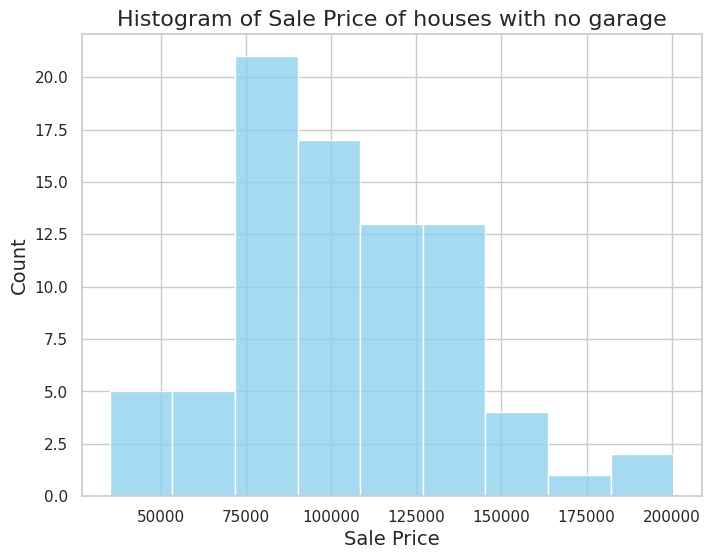

In [ ]:
df_no_garage = df[df['GarageCars'] == 0]
sns.set(style='whitegrid')

# Создание гистограммы цены продажи домов без гаража
plt.figure(figsize=(8, 6))
sns.histplot(data=df_no_garage, x='SalePrice', color='skyblue')

plt.title('Histogram of Sale Price of houses with no garage', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

е) Гистограмму цены продажи дома с гаражом на 1 машину
title='Histogram of Sale Price of houses with 1-car garage'

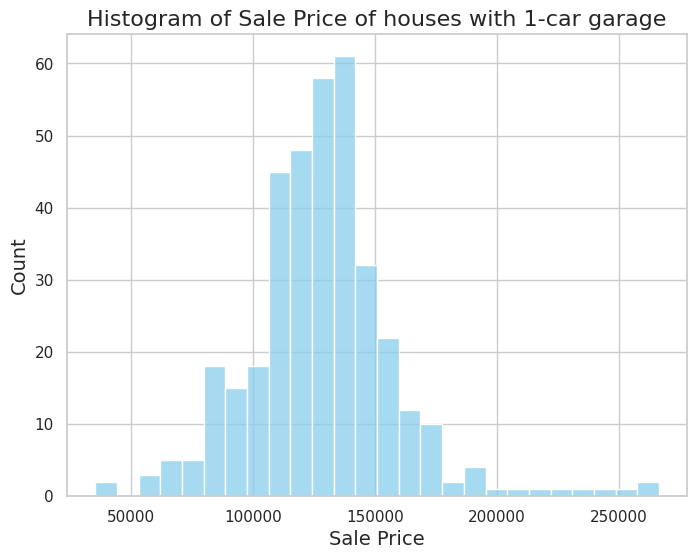

In [ ]:
df_no_garage = df[df['GarageCars'] == 1]
sns.set(style='whitegrid')

# Создание гистограммы цены продажи домов без гаража
plt.figure(figsize=(8, 6))
sns.histplot(data=df_no_garage, x='SalePrice', color='skyblue')

plt.title('Histogram of Sale Price of houses with 1-car garage', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

ё) Гистограмму цены продажи дома с гаражом на 2 машины
title='Histogram of Sale Price of houses with 2-car garage')

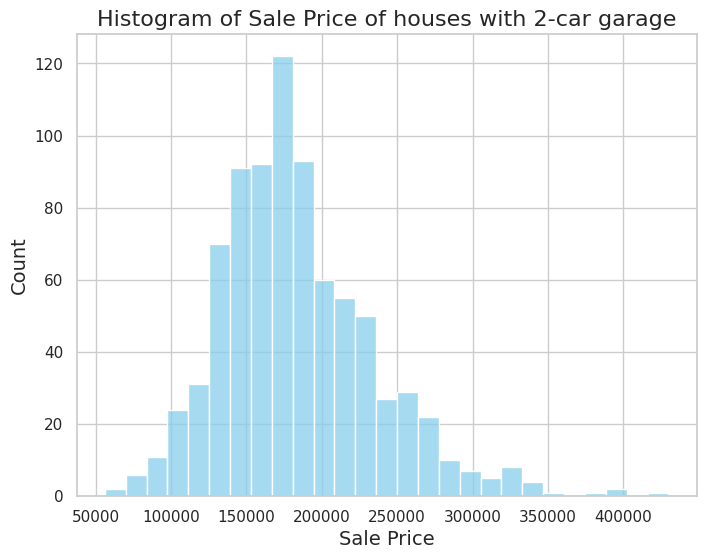

In [ ]:
df_no_garage = df[df['GarageCars'] == 2]
sns.set(style='whitegrid')

# Создание гистограммы цены продажи домов без гаража
plt.figure(figsize=(8, 6))
sns.histplot(data=df_no_garage, x='SalePrice', color='skyblue')

plt.title('Histogram of Sale Price of houses with 2-car garage', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

ж) Гистограмму цены продажи дома с гаражом на 3 машины
title='Histogram of Sale Price of houses with 3-car garage'

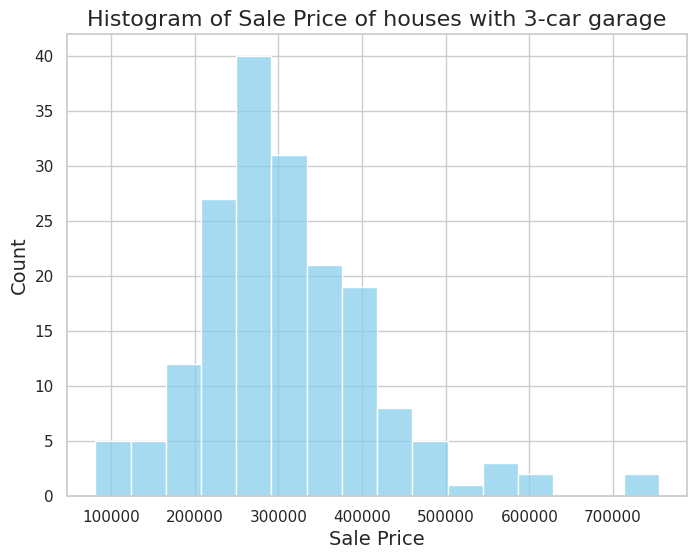

In [ ]:
df_no_garage = df[df['GarageCars'] == 3]
sns.set(style='whitegrid')

# Создание гистограммы цены продажи домов без гаража
plt.figure(figsize=(8, 6))
sns.histplot(data=df_no_garage, x='SalePrice', color='skyblue')

plt.title('Histogram of Sale Price of houses with 3-car garage', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

з) Гистограмму цены продажи дома с гаражом на 4 машины
title='Histogram of Sale Price of houses with 4-car garage'

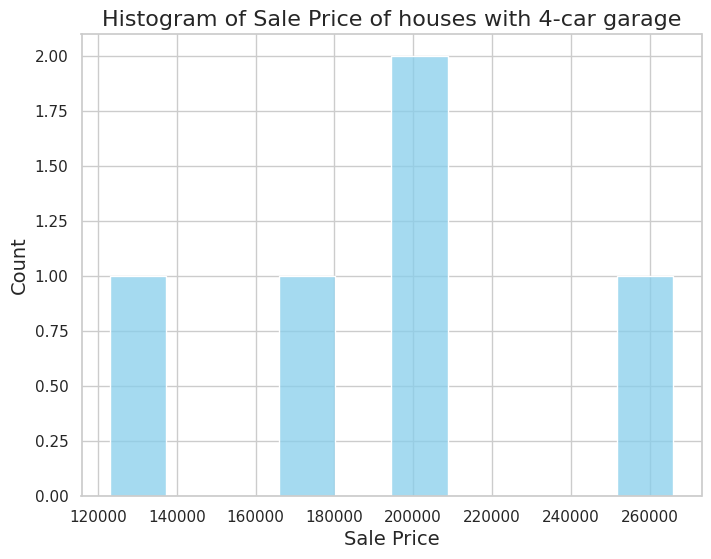

In [ ]:
df_no_garage = df[df['GarageCars'] == 4]
sns.set(style='whitegrid')

# Создание гистограммы цены продажи домов без гаража
plt.figure(figsize=(8, 6))
sns.histplot(data=df_no_garage, x='SalePrice', color='skyblue', bins=10)

plt.title('Histogram of Sale Price of houses with 4-car garage', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

6.4. Таблица частот
Значение частоты говорит о том, как часто какая-то величина встречается в
выборке.
Общую таблицу частот параметров можно получить, исполнив программный код:

In [ ]:
x = df.OverallQual.value_counts()
x/x.sum()


5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

а) Таблица частот размеров гаража

In [ ]:
x = df.GarageCars.value_counts()
x/x.sum()

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

Двухместные гаражи самые распространенные

б) Таблица частот центрального кондиционирования

In [ ]:
x = df.CentralAir.value_counts()
x/x.sum()

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

6.5. Числовые характеристики параметров
Быстрый способ получить набор числовых сводок для количественной
переменной – это использовать метод description.

In [ ]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Рассчитайте долю домов с продажной ценой между 25-м процентилем (129975)
и 75-м процентилем (214000).

In [ ]:
print('The proportion of the houses with prices between 25th percentile and 75th percentile: ', np.mean((df.SalePrice >= 129975) & (df.SalePrice <= 214000)))


The proportion of the houses with prices between 25th percentile and 75th percentile:  0.5020547945205479


Рассчитайте долю домов с общей площадью в квадратных футах от 25-го
процентиля (795,75) до 75-го процентиля (1298,25).

In [ ]:
print('The proportion of house with total square feet of basement area between 25th percentile and 75th percentile: ', np.mean((df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)))

The proportion of house with total square feet of basement area between 25th percentile and 75th percentile:  0.5


Наконец, мы рассчитаем долю домов на основе любых условий. Поскольку
некоторые дома соответствуют обоим критериям, приведенная ниже пропорция
меньше суммы двух пропорций, рассчитанных выше.


In [ ]:
a = (df.SalePrice >= 129975) & (df.SalePrice <= 214000)
b = (df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)
print(np.mean(a | b))

0.7143835616438357


Рассчитать цену продажи интерквартильного размаха IQR для домов без
кондиционера. Англоязычная аббревиатура IQR – интерквартильный размах –
число, которое показывает разброс средней половины (т.е. средние 50%) набора
данных и помогает определить выбросы. IQR – это разница между третьим
квартилем (Q3) и первым(Q1).


In [ ]:
q75, q25 = np.percentile(df.loc[df['CentralAir']=='N']['SalePrice'], [75,25])
iqr = q75 - q25
print('Sale price IQR for houses with no air conditioning: ', iqr)


Sale price IQR for houses with no air conditioning:  46500.0


Рассчитать цену продажи IQR для домов с кондиционером

In [ ]:
q75, q25 = np.percentile(df.loc[df['CentralAir']=='Y']['SalePrice'], [75,25])
iqr = q75 - q25
print('Sale price IQR for houses with air conditioning: ', iqr)

Sale price IQR for houses with air conditioning:  84410.0


6.6 Стратификация

Другой способ получить больше информации из набора данных – разделить его
на более мелкие, более однородные подмножества и проанализировать каждое из
этих подмножеств.
– Создадим новый столбец HouseAge (YearBuilt), затем разделим данные на части
HouseAge и построим параллельные боксовые диаграммы цены продажи внутри
каждой страты.

<Axes: xlabel='AgeGrp', ylabel='SalePrice'>

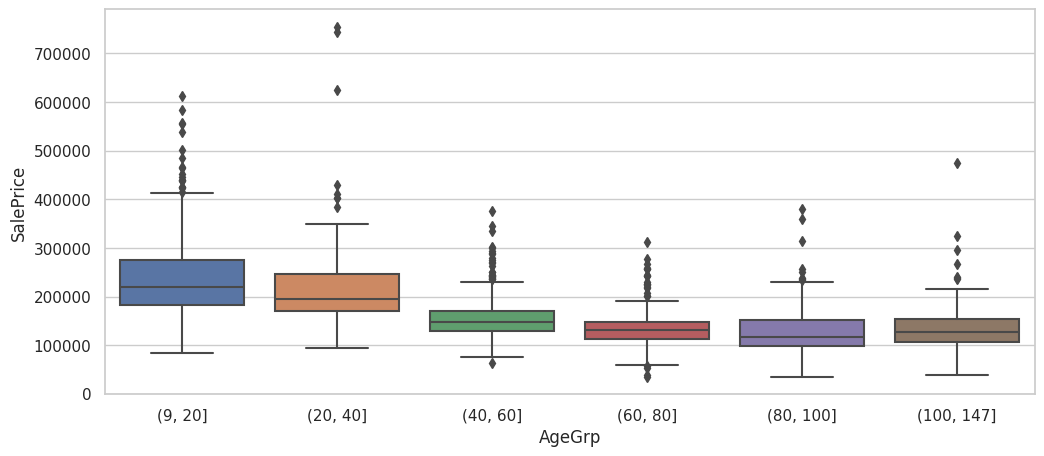

In [ ]:
df['HouseAge'] = 2019 - df['YearBuilt']
df["AgeGrp"] = pd.cut(df.HouseAge, [9, 20, 40, 60, 80,100, 147]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))
sns.boxplot(x="AgeGrp", y="SalePrice", data=df)

Вопрос: Сравните возраст дома и среднюю цену на него. Какая наблюдается
закономерность?

На более молодые дома цена дороже

Ранее мы узнали, что цены на жилье, как правило, различаются по наличию или
отсутствию кондиционеров в них. Из построенных по приведенному ниже коду
графиков сделайте вывод: какие по возрасту дома более оснащены
кондиционерами.

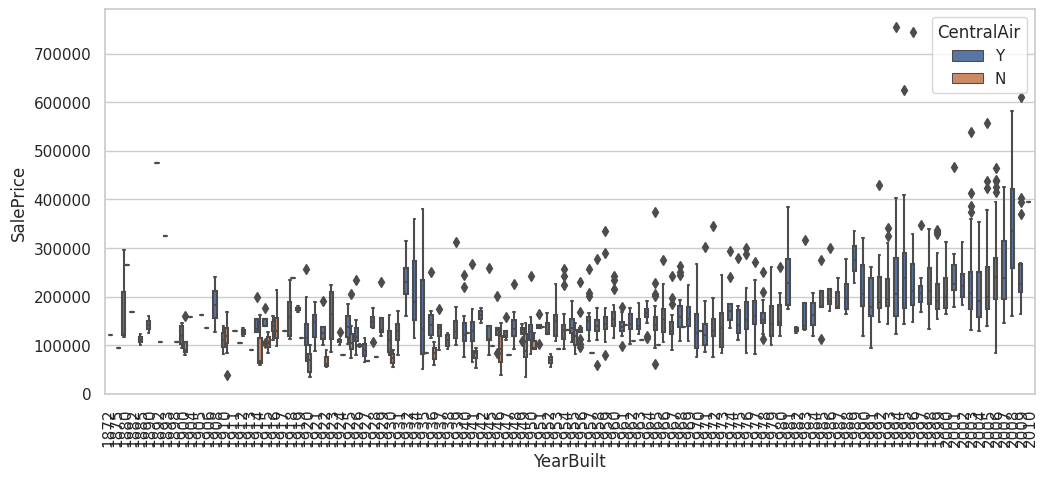

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="YearBuilt", y="SalePrice", hue="CentralAir", data=df)
plt.xticks(rotation=90)
plt.show()

Молодые дома более оснащены кондиционерами.

Теперь мы сгруппируем сначала по кондиционированию воздуха, а затем в
группе кондиционирования по возрастным группам. Каждый подход
подчеркивает различные аспекты данных.

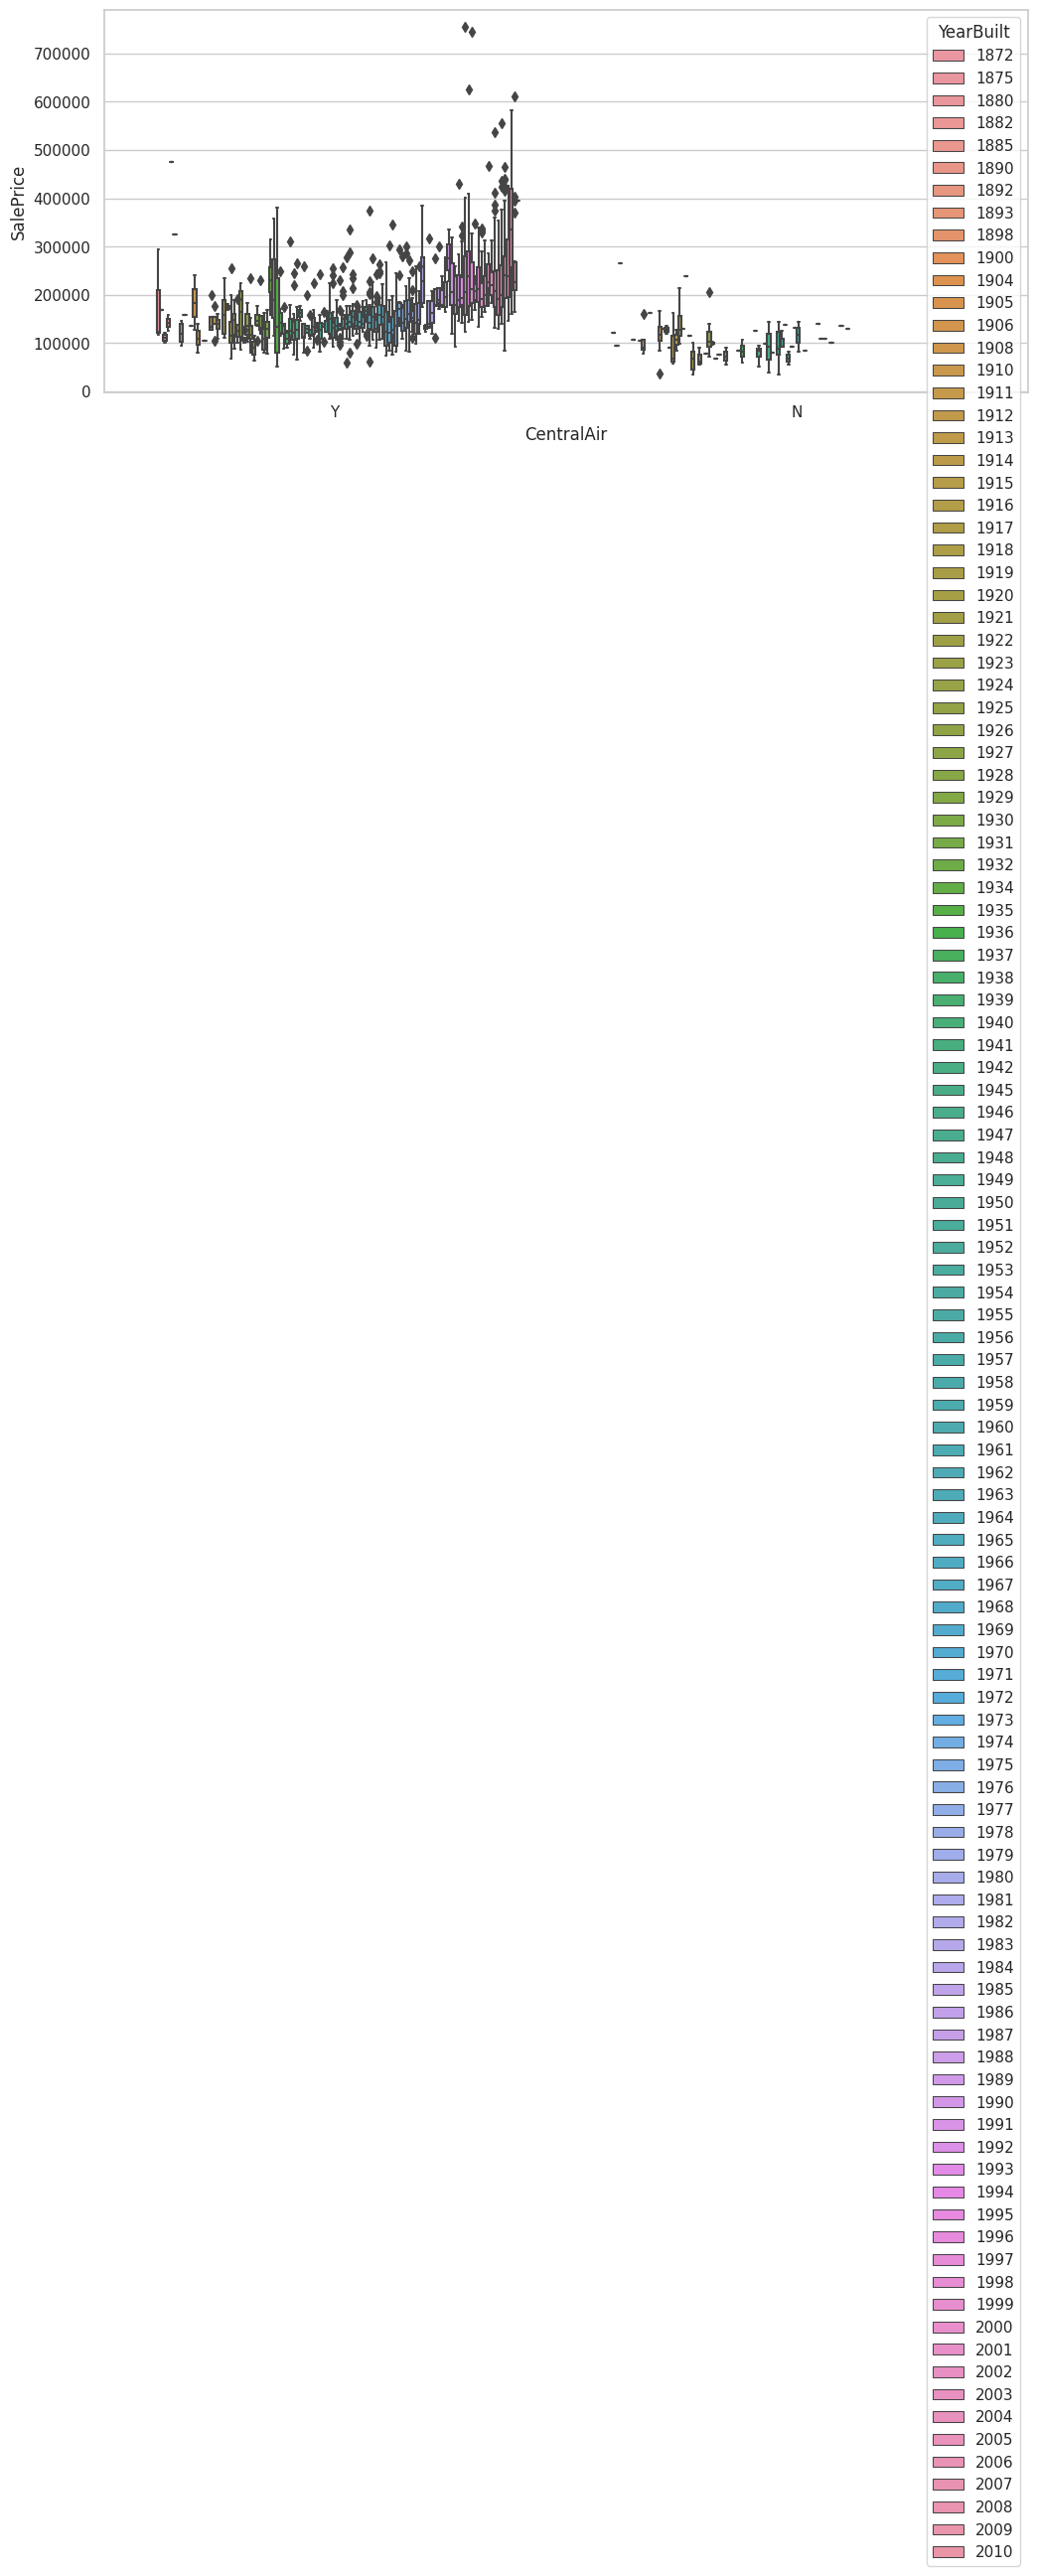

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="CentralAir", y="SalePrice", hue="YearBuilt", data=df)
plt.show()


Мы также можем рассортировать по возрасту дома и кондиционированию
воздуха, чтобы исследовать, как тип здания зависит от обоих этих факторов
одновременно.


In [ ]:
df1 = df.groupby(["YearBuilt", "CentralAir"])["BldgType"]
df1 = df1.value_counts()
df1 = df1.unstack()
df1 = df1.apply(lambda x: x/x.sum(), axis=1)
print(df1.to_string(float_format="%.3f"))

BldgType              1Fam  2fmCon  Duplex  Twnhs  TwnhsE
YearBuilt CentralAir                                     
1872      N          1.000     NaN     NaN    NaN     NaN
1875      N          1.000     NaN     NaN    NaN     NaN
1880      N          1.000     NaN     NaN    NaN     NaN
          Y          1.000     NaN     NaN    NaN     NaN
1882      Y          1.000     NaN     NaN    NaN     NaN
1885      Y          0.500   0.500     NaN    NaN     NaN
1890      Y          1.000     NaN     NaN    NaN     NaN
1892      N          1.000     NaN     NaN    NaN     NaN
          Y          1.000     NaN     NaN    NaN     NaN
1893      Y          1.000     NaN     NaN    NaN     NaN
1898      N          1.000     NaN     NaN    NaN     NaN
1900      N          0.400   0.600     NaN    NaN     NaN
          Y          0.400   0.400   0.200    NaN     NaN
1904      Y          1.000     NaN     NaN    NaN     NaN
1905      N            NaN   1.000     NaN    NaN     NaN
1906      Y   

6.6. Отображения диаграмм
– Построим диаграммы рассеяния, отражающие взаимосвязь между
переменными:

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

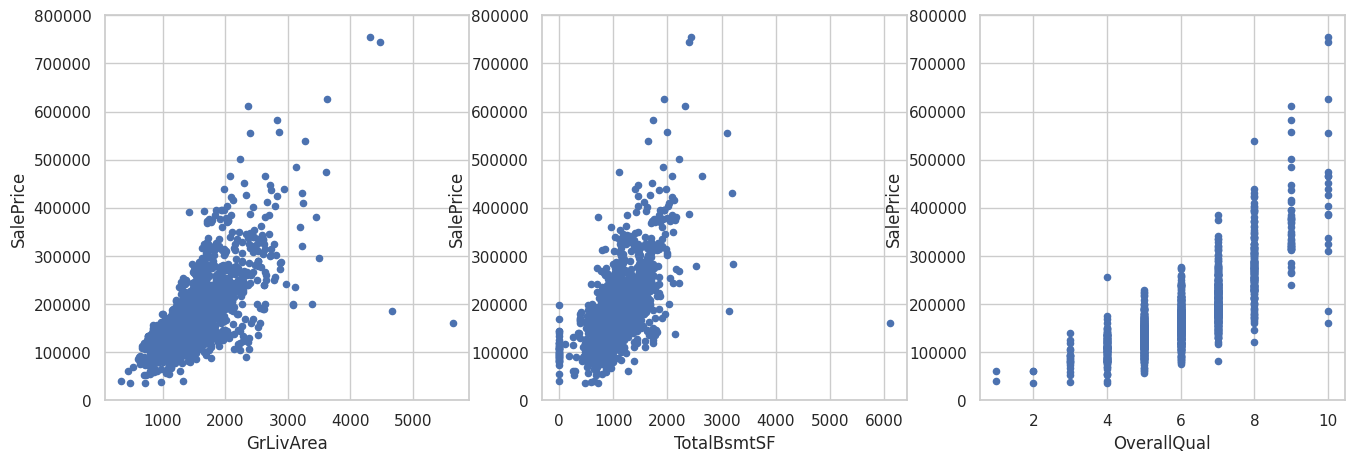

In [ ]:
output,var,var1,var2 = 'SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual'
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df.plot.scatter(x=var,y=output,ylim=(0,800000),ax=axes[0])
df.plot.scatter(x=var1,y=output,ylim=(0,800000),ax=axes[1])
df.plot.scatter(x=var2,y=output,ylim=(0,800000),ax=axes[2])

Наблюдается ли взаимосвязь между переменными?

Взаимосвязь здесь - прямо пропорциональная зависимость цены от выбранного признака.

Отображение прямоугольной диаграммой

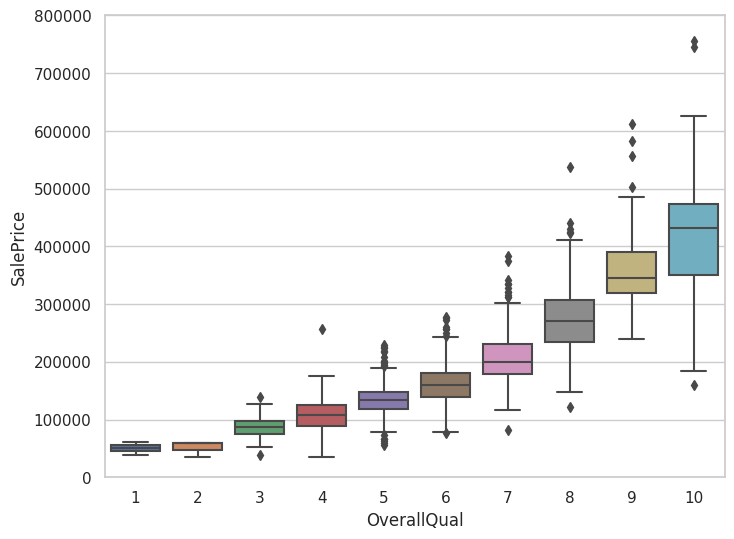

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=var2,y=output,data=df)
ax.set_ylim(0,800000)
plt.show()


Между какими параметрами построен boxplot? Есть ли выбросы в данных?

Boxplot построен между параметрами SalePrice и OverallQual. Выбросы присутствуют.

Рассмотрите эффект, нарисованный seaborn:

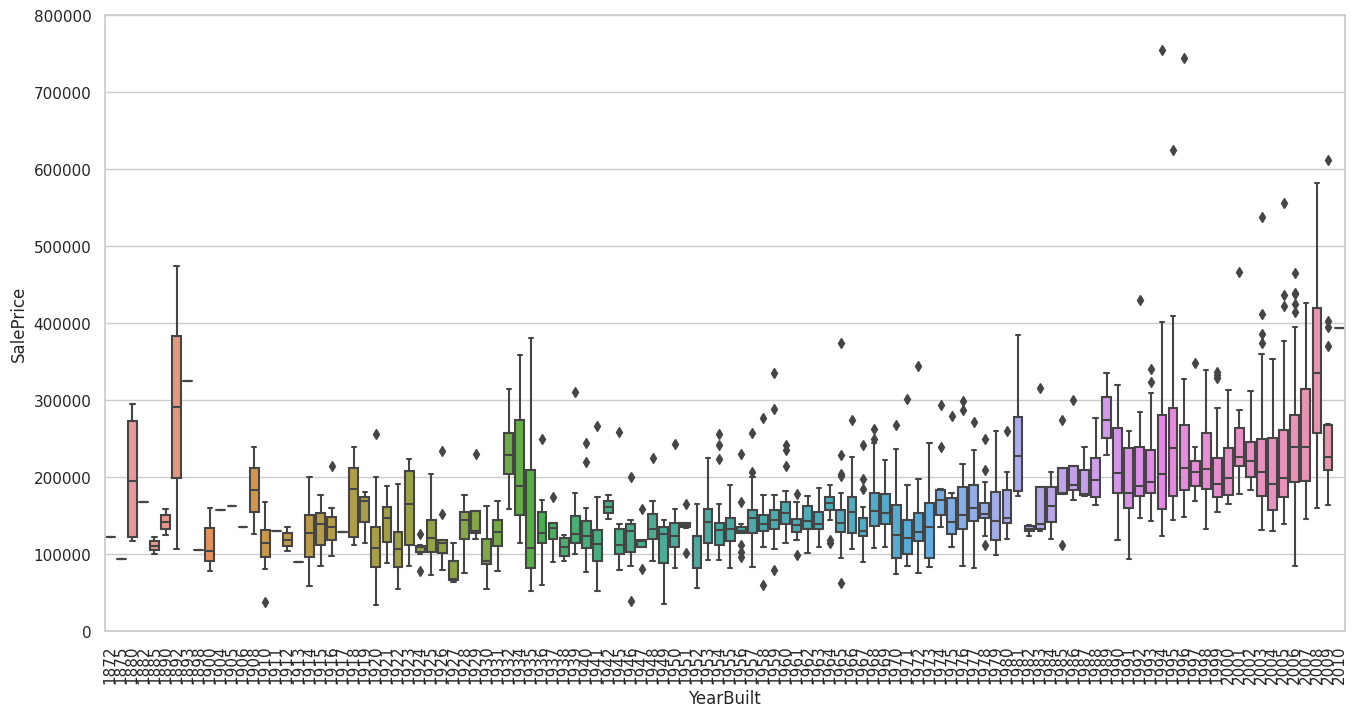

In [ ]:
var3 = 'YearBuilt'
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=var3,y=output,data=df)
ax.set_ylim(0,800000)
plt.xticks(rotation=90)
plt.show()


6.7. Отображение тепловой карты характеристической
ковариационной матрицы
Получите ковариационную матрицу для всех данных DataFrame и используйте
анализ тепловой карты:

<ipython-input-111-943e81e98b00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


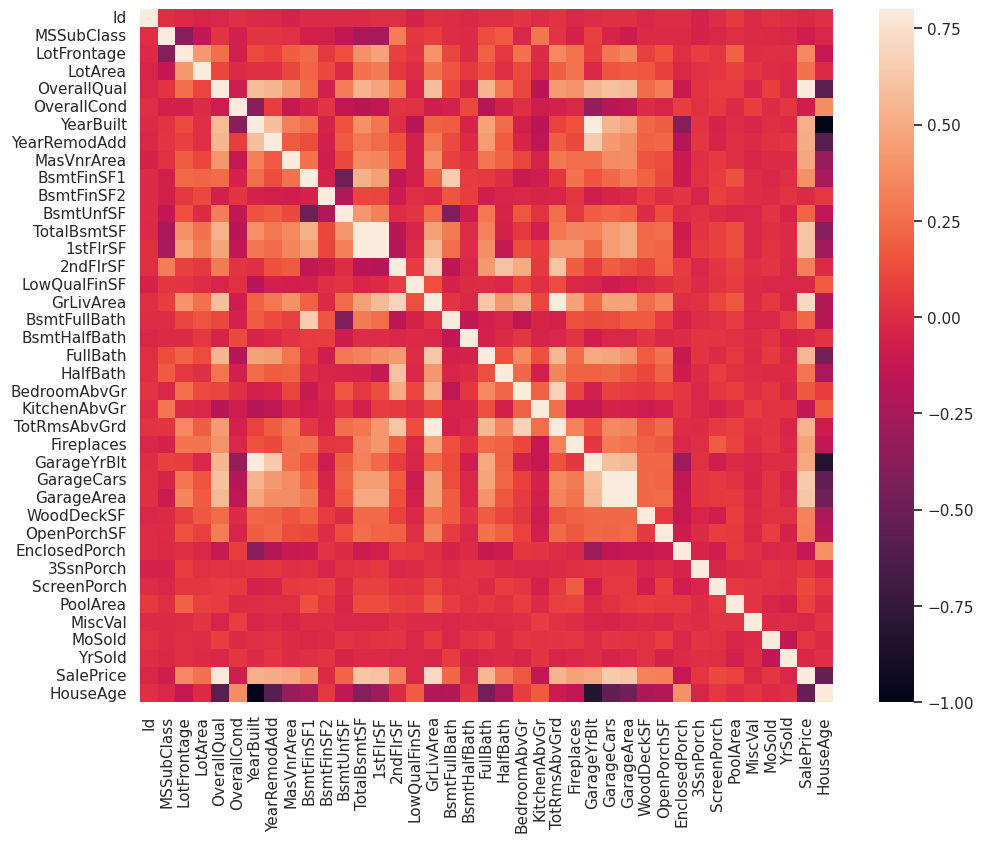

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap (corrmat, vmax = .8, square = True, ax = ax) # Параметр square гарантирует, что когда corrmat -неквадратная матрица, общий вывод графика по-прежнему будетквадратным
plt.show()


Давайте выберем 10 параметров с наибольшей корреляцией с SalePrice,
чтобы проанализировать корреляцию между ними.

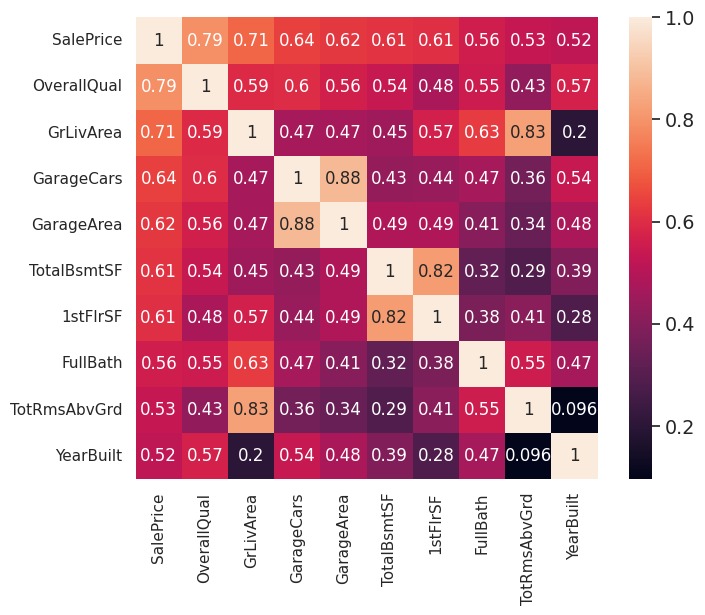

In [ ]:
k = 10
top10_attr = corrmat.nlargest(k, output).index
top10_mat = corrmat.loc[top10_attr, top10_attr]
fig,ax = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.25)
sns.heatmap(top10_mat, annot=True, annot_kws={'size':12}, square=True)
# Установите аннотацию для отображения чисел в маленьких ячейках и annot_kws для настройки числового формата
plt.show()

6.7. Графическая матрица, объединяющая точечные и столбчатые
диаграммы

Seaborn может интегрировать информацию о диаграммах рассеяния и
гистограммах нескольких объектов. В результате получим матрицу графиков,
образованную комбинациями между каждыми двумя параметрами.
Постройте выбранные параметры следующим образом:

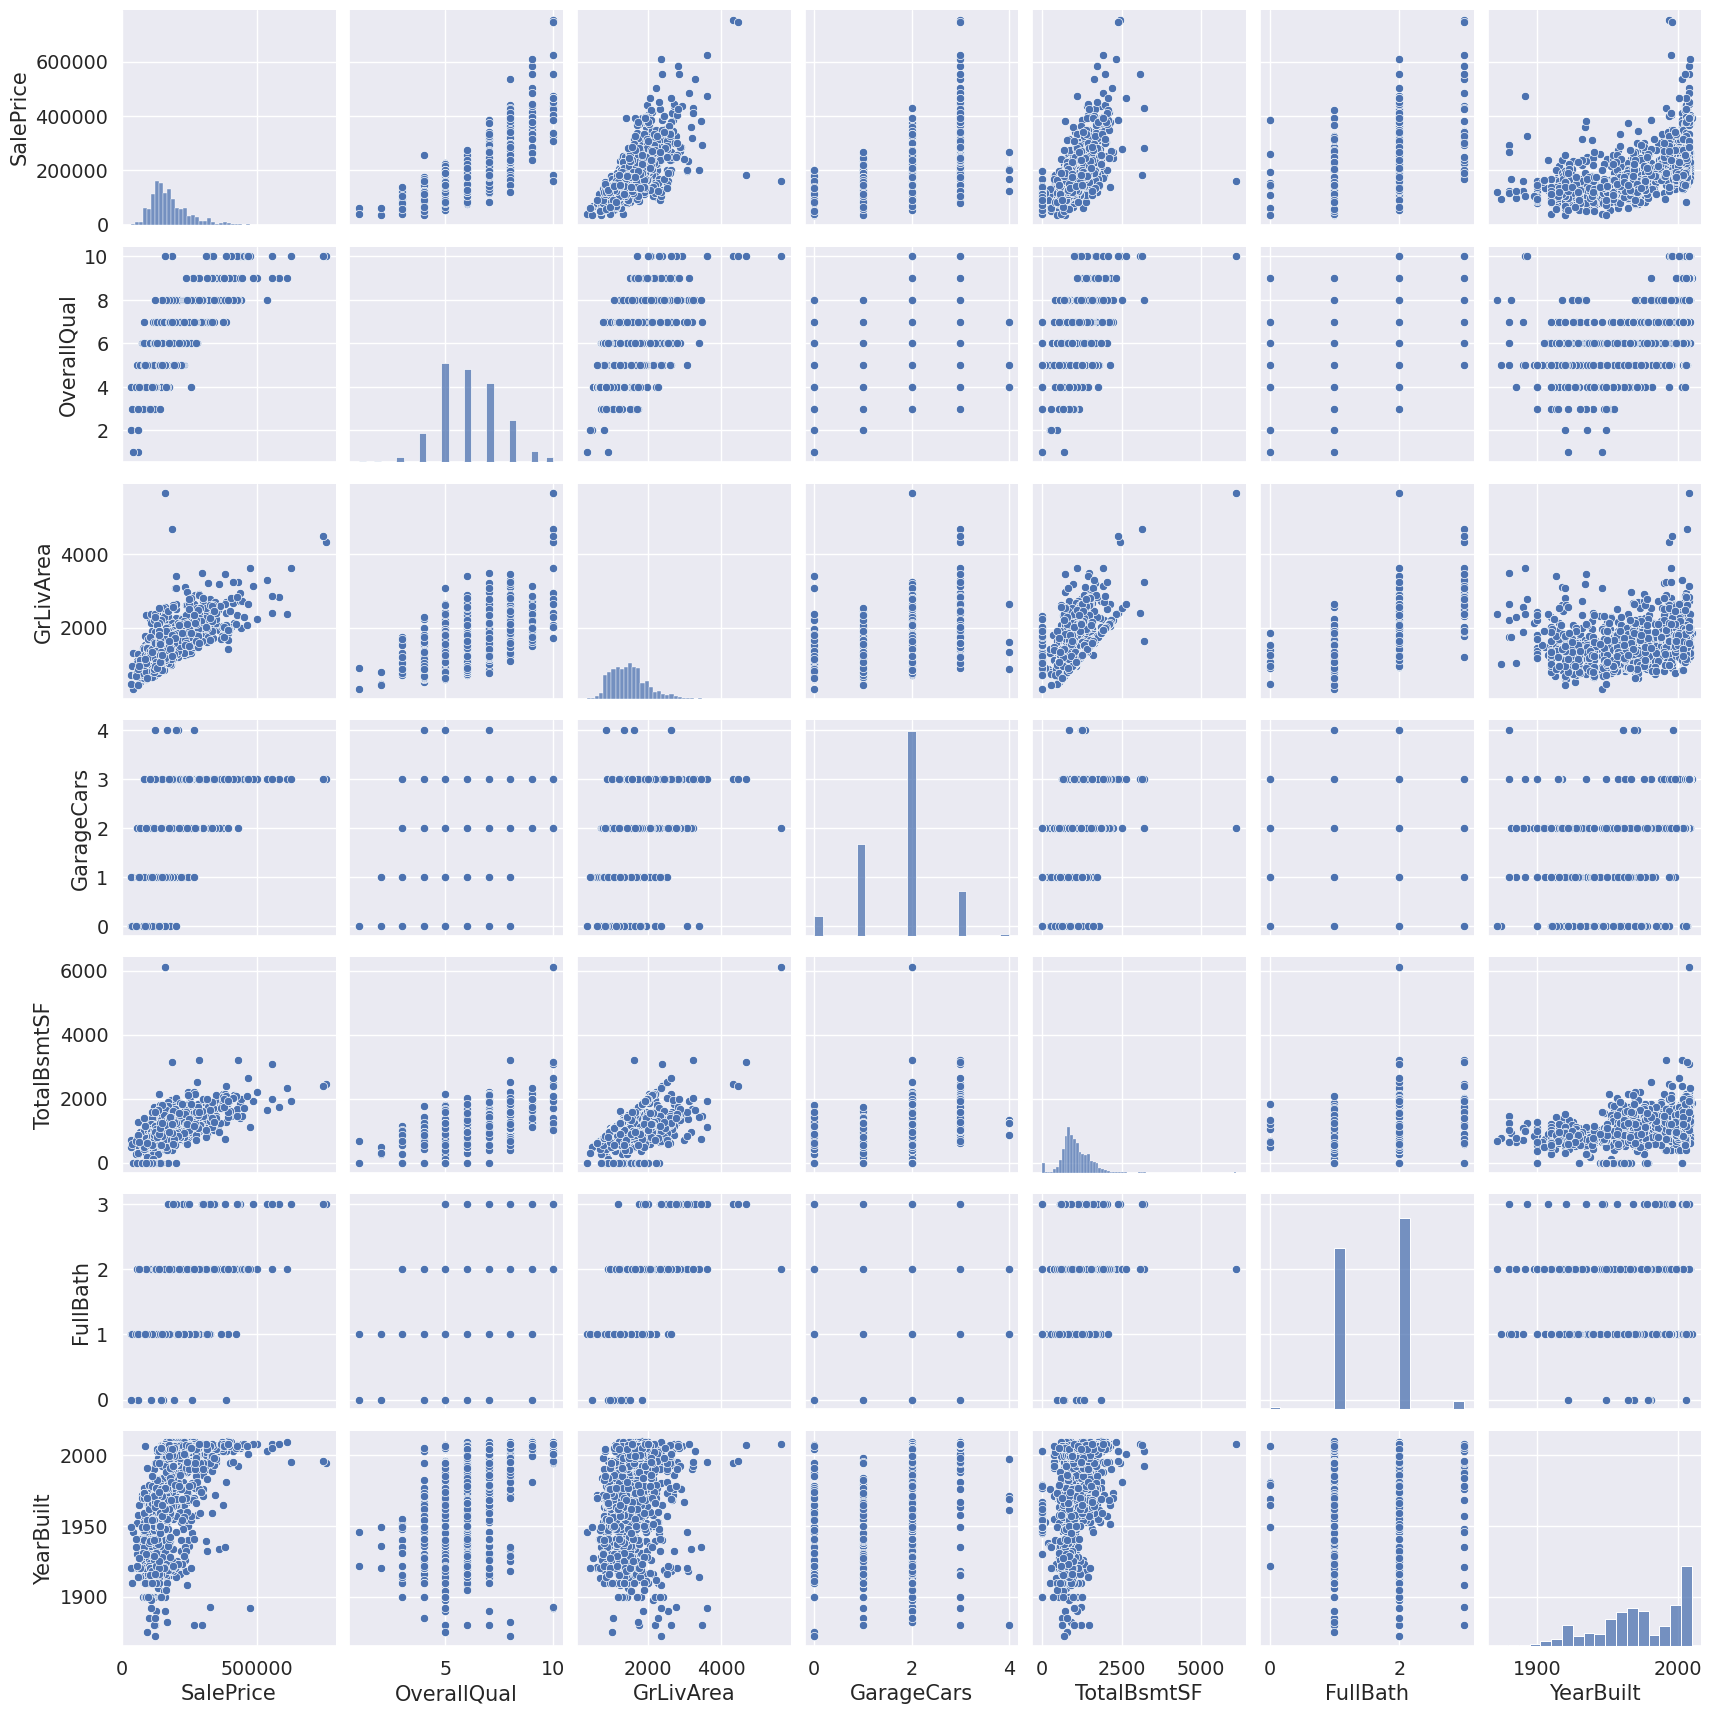

In [ ]:
var_set = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set (font_scale = 1.25) # Устанавливаем размер шрифта по горизонтальной и вертикальной оси
sns.pairplot (df[var_set]) # 7 * 7 графическая матрица
# Различные типы отображения могут быть установлены в параметрах kind и diag_kind, вот диаграммы разброса и гистограммы, и вы также можете установить разные типы отображения на каждом графике
plt.show()